In [ ]:
!nvidia-smi

Fri Oct 21 14:42:09 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from matplotlib import pyplot as plt
import cv2
import os
# text recognizer: pytesseract vs easyocr vs keras_ocr
import easyocr

**1. You can get the pics through camera**

In [ ]:
# set the path of img
img_path = os.path.join(os.getcwd(), 'img')
# camera capture images
image_sample_path = os.path.join(img_path, 'sample.jpg')
img_test_path = os.path.join(img_path, 'test.png')
img_test_2_path = os.path.join(img_path, 'test2.png')
img_test_3_path = os.path.join(img_path, 'test3.png')

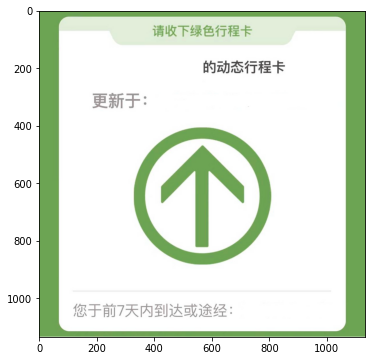

In [ ]:
img = cv2.imread(image_sample_path)
plt.figure(figsize=(6, 6))
plt.imshow(img)

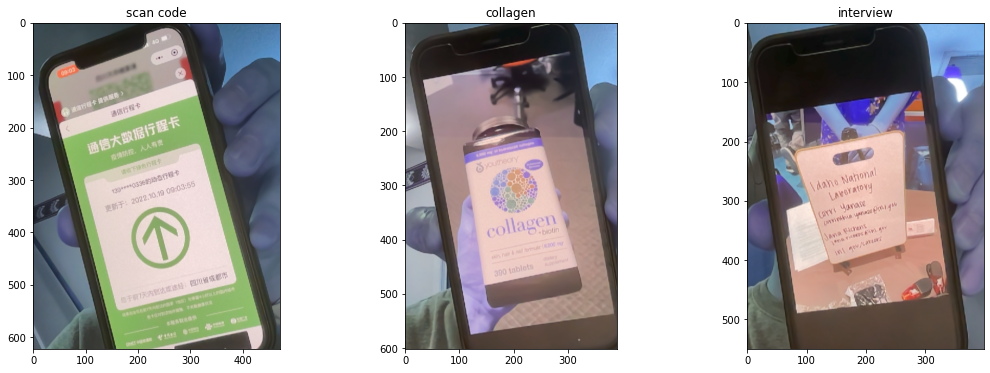

In [ ]:
img_test = cv2.imread(img_test_path)
img_test_2 = cv2.imread(img_test_2_path)
img_test_3 = cv2.imread(img_test_3_path)
f, axarr = plt.subplots(1, 3, figsize=(18,6))
plt.sca(axarr[0]); 
plt.imshow(img_test); plt.title('scan code')
plt.sca(axarr[1]); 
plt.imshow(img_test_2); plt.title('collagen')
plt.sca(axarr[2]); 
plt.imshow(img_test_3); plt.title('interview')
plt.show()

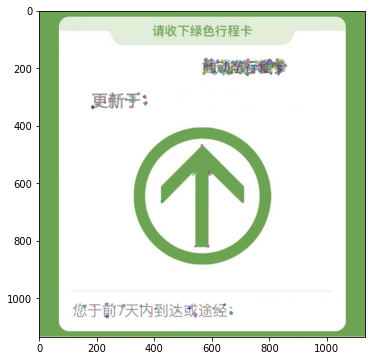

time: 489 ms (started: 2022-10-21 15:28:39 +00:00)


In [ ]:
keypoint_img = img
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img, None)
marked_image = cv2.drawKeypoints(img, kp1, keypoint_img)
plt.figure(figsize=(6, 6))
plt.imshow(marked_image)

In [ ]:
def find_matches(standard, sample):
  orb = cv2.ORB_create()

  kp1, des1 = orb.detectAndCompute(standard, None)
  kp2, des2 = orb.detectAndCompute(sample, None)

  bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=False)
  match = bf.knnMatch(des1, des2, k=2)

  good = []
  for m, n in match:
      if m.distance < 0.6 * n.distance:
          good.append([m])

  compare_image = cv2.drawMatchesKnn(standard, kp1, sample, kp2, good, None, flags=2)

  return len(good), compare_image

In [ ]:
def show_res(standard, image_list):
  n = len(image_list)
  f = plt.figure(figsize=(24,8))
  for i in range(n):
    f.add_subplot(1, n, i + 1)
    similarities, res_image = find_matches(standard, image_list[i])
    plt.imshow(res_image)
    plt.title('similarities: ' + str(similarities))
  plt.show(block=True)

In [ ]:
# resize the standard image
RESIZED_LENGTH = 500
dim = (RESIZED_LENGTH, RESIZED_LENGTH)
resized_image = cv2.resize(img, dim)

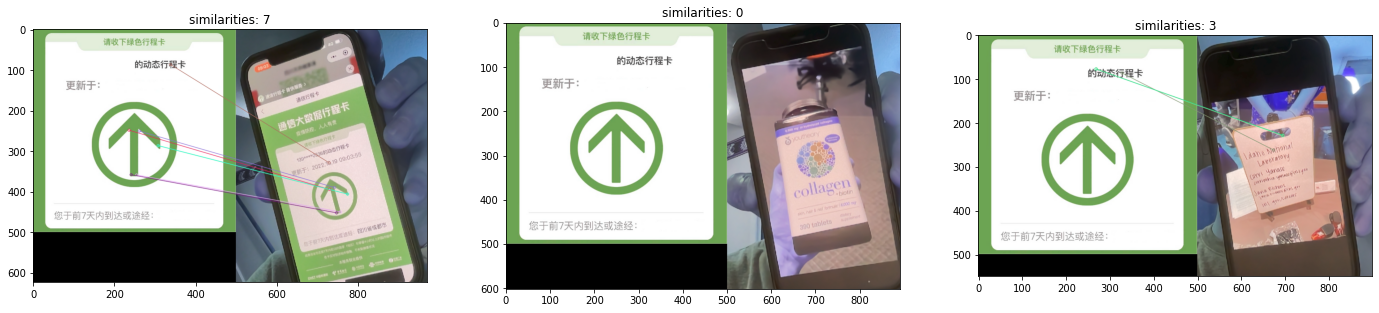

In [ ]:
image_list = [img_test, img_test_2, img_test_3]
show_res(resized_image, image_list)

In [ ]:
# gray scale image
image_grey = cv2.imread(image_sample_path, 0)
resized_image_grey = cv2.resize(image_grey, dim)
img_test_grey = cv2.imread(img_test_path, 0)
img_test_2_grey = cv2.imread(img_test_2_path, 0)
img_test_3_grey = cv2.imread(img_test_3_path, 0)

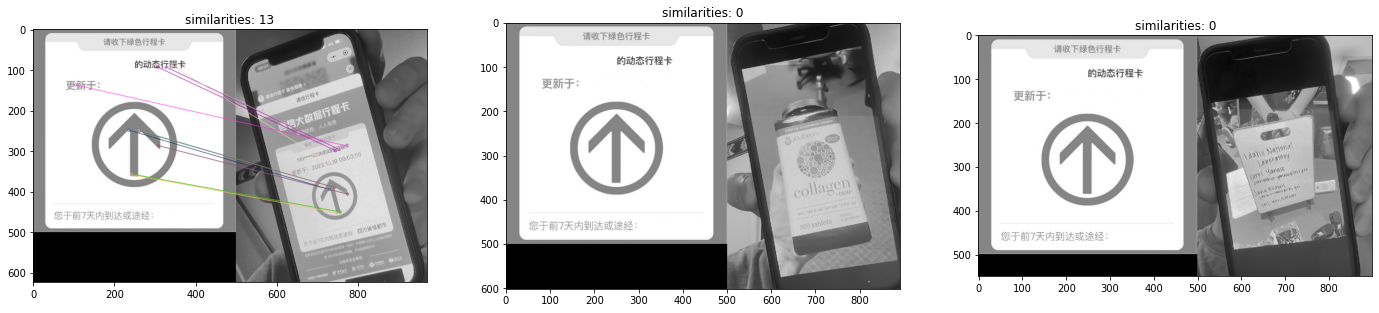

In [ ]:
image_list = [img_test_grey, img_test_2_grey, img_test_3_grey]
show_res(resized_image_grey, image_list)

**2. read text**

In [ ]:
reader = easyocr.Reader(['ch_sim'], gpu = True) # this needs to run only once to load the model into memory

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
standard_res = reader.readtext(img)

In [ ]:
standard_res

[([[387, 45], [747, 45], [747, 105], [387, 105]],
  '请收下绿色行程卡',
  0.9389603119012707),
 ([[563, 167], [861, 167], [861, 231], [563, 231]],
  '的动态行程卡',
  0.9800753739027713),
 ([[178, 278], [388, 278], [388, 352], [178, 352]],
  '更新于:',
  0.9827020168304443),
 ([[108, 1008], [666, 1008], [666, 1080], [108, 1080]],
  '您于前7天内到达或途经 =',
  0.6995728201917466)]

In [ ]:
result = reader.readtext(image_list[0])

In [ ]:
result

[([[118.03883864861815, 142.60776772972363],
   [165.61922088678878, 128.82606485707814],
   [169.96116135138183, 145.39223227027637],
   [122.38077911321122, 160.17393514292186]],
  '悃似;',
  1.544783756964495e-06),
 ([[68.03883864861815, 160.60776772972363],
   [121.61280999171142, 142.81727267274496],
   [127.96116135138185, 159.39223227027637],
   [73.38719000828858, 178.18272732725504]],
  '』竹9卡',
  3.2292660762323067e-05),
 ([[139.03883864861817, 166.60776772972363],
   [205.62746694241346, 144.8375236125618],
   [211.96116135138183, 165.39223227027637],
   [146.37253305758654, 187.1624763874382]],
  '遁僖行}[',
  9.784659734880075e-05),
 ([[155.8765247622279, 206.5012198097823],
   [282.40237827818413, 168.8967116098498],
   [291.12347523777214, 203.4987801902177],
   [165.59762172181584, 241.1032883901502]],
  ':敞椐仔程卡',
  0.02766025576068564),
 ([[94.02682341501134, 226.3241410735102],
   [171.20609649110287, 207.60815023679626],
   [177.97317658498866, 240.6758589264898],
   [101.

In [ ]:
high_res_img = cv2.imread('./img/high_res.jpg', 0)

In [ ]:
high_res_img.shape

(4032, 3024)

time: 3.17 ms (started: 2022-10-21 14:50:41 +00:00)


In [ ]:
result = reader.readtext(high_res_img, detail = 0)

time: 2.06 s (started: 2022-10-21 14:51:21 +00:00)


In [ ]:
result

['09:03',
 '46',
 '通信行程卡提供服务 >',
 '通信行程卡',
 '通信大数据仔程卡',
 '人人有责',
 '请收下绿色行程卡',
 '139****0336的动态行程卡',
 '更新于:  2022.',
 '09:03:55',
 '(地区)',
 '「〈「',
 '8',
 '60',
 '中国移动',
 '0',
 '器',
 '~证通查来了 !',
 '立即点击迸入',
 '疫情防控;',
 '10.19',
 '您于前7天内到达或途经:',
 '四川省成都市',
 '结果包含您在前7天内到访的国家',
 '与停留4小时以上的国内城市',
 '色卡仅对到访地作提醒;',
 '不关联健康状况',
 '本服务联合提供',
 '中倌通院',
 '#忠',
 '《',
 '中国联通',
 '',
 '@']

time: 4.6 ms (started: 2022-10-21 14:50:50 +00:00)


In [ ]:
h, w = high_res_img.shape
RESIZED_WIDTH = 1000
RESIZED_HEIGHT = int (RESIZED_WIDTH * h / w)
dim = (RESIZED_WIDTH, RESIZED_HEIGHT)
high_res_resized_img = cv2.resize(high_res_img, dim)

time: 4.98 ms (started: 2022-10-21 14:51:02 +00:00)


In [ ]:
result = reader.readtext(high_res_resized_img, detail = 0)
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 716 ms (started: 2022-10-21 14:51:08 +00:00)


In [ ]:
result

['09:03',
 '46',
 '通信行程卡',
 '通信行程卡',
 '通信大敬据仔程卡',
 '疫情防控;人人有责',
 '请收下绿色行程卡',
 '更新于:  2022.10.19',
 '(地区)  与停留4小肘以_',
 "'上的国内城市",
 '〈',
 "'中僧馗院",
 '(忠',
 '螅鼬',
 "#忠'迥",
 '螺骘',
 '立即点击迸入',
 '提供服务',
 '139****0336的动态行程卡',
 '09:03:55',
 '您于前7天内到达或途经:',
 '四川省成都市',
 '绮果包含您在前7天内到访的国家',
 '色卡仅对到访地作提憩;',
 '不关联鲢庾状况',
 '本服务联合提供 ',
 '~证通查来了!']

In [ ]:
cities = ["四川省成都市", "四川省绵阳市", "广东省佛山市", "西藏自治区拉萨市"]
matching = [xs in result for xs in cities]
print(cities[matching.index(True)])

四川省成都市


**3. 合体**

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0 
while True:
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break
    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes

<IPython.core.display.Javascript object>